# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [3]:
#print(cities)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up url links for the loop
base_url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
query_url = f"{base_url}appid={weather_api_key}&unit={unit}&q="

# set up lists and counter for loop
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1


# set up print statement
print("Start Data Pull")
print("---------------")

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")



Start Data Pull
---------------
Processing Record 1 of Set 1 : rikitea
Processing Record 2 of Set 1 : bobo dioulasso
City not found. Skipping...
Processing Record 3 of Set 1 : nikolskoye
Processing Record 4 of Set 1 : hermanus
Processing Record 5 of Set 1 : gramsh
Processing Record 6 of Set 1 : mataura
Processing Record 7 of Set 1 : liberia
Processing Record 8 of Set 1 : ushuaia
Processing Record 9 of Set 1 : lebu
Processing Record 10 of Set 1 : thompson
Processing Record 11 of Set 1 : bluff
City not found. Skipping...
Processing Record 12 of Set 1 : molo
Processing Record 13 of Set 1 : margate
Processing Record 14 of Set 1 : port alfred
Processing Record 15 of Set 1 : kaitangata
Processing Record 16 of Set 1 : gornoye loo
Processing Record 17 of Set 1 : bastia
Processing Record 18 of Set 1 : mar del plata
Processing Record 19 of Set 1 : georgetown
Processing Record 20 of Set 1 : bezhetsk
Processing Record 21 of Set 1 : cherskiy
Processing Record 22 of Set 1 : north platte
Processing R

Processing Record 37 of Set 4 : dunedin
Processing Record 38 of Set 4 : kudahuvadhoo
Processing Record 39 of Set 4 : anaconda
City not found. Skipping...
Processing Record 40 of Set 4 : rapid valley
Processing Record 41 of Set 4 : victoria
Processing Record 42 of Set 4 : kahului
Processing Record 43 of Set 4 : prince rupert
Processing Record 44 of Set 4 : javanrud
Processing Record 45 of Set 4 : karoi
City not found. Skipping...
Processing Record 46 of Set 4 : deputatskiy
Processing Record 47 of Set 4 : camocim
Processing Record 48 of Set 4 : mitu
Processing Record 49 of Set 4 : talaban
Processing Record 50 of Set 4 : kefamenanu
Processing Record 0 of Set 5 : choma
Processing Record 1 of Set 5 : saint-francois
Processing Record 2 of Set 5 : kruisfontein
Processing Record 3 of Set 5 : berbera
City not found. Skipping...
Processing Record 4 of Set 5 : batemans bay
Processing Record 5 of Set 5 : talen
Processing Record 6 of Set 5 : amursk
Processing Record 7 of Set 5 : aguimes
Processing 

Processing Record 24 of Set 8 : bilma
Processing Record 25 of Set 8 : puerto colombia
Processing Record 26 of Set 8 : tiarei
Processing Record 27 of Set 8 : raudeberg
Processing Record 28 of Set 8 : sept-iles
Processing Record 29 of Set 8 : ishim
Processing Record 30 of Set 8 : aden
Processing Record 31 of Set 8 : uige
Processing Record 32 of Set 8 : mackenzie
Processing Record 33 of Set 8 : basqal
Processing Record 34 of Set 8 : puerto carreno
Processing Record 35 of Set 8 : bengkulu
Processing Record 36 of Set 8 : kamina
Processing Record 37 of Set 8 : simao
Processing Record 38 of Set 8 : calvinia
Processing Record 39 of Set 8 : pierre
Processing Record 40 of Set 8 : yantzaza
Processing Record 41 of Set 8 : arlit
Processing Record 42 of Set 8 : asheboro
Processing Record 43 of Set 8 : bay-khaak
Processing Record 44 of Set 8 : svetlyy
Processing Record 45 of Set 8 : narsaq
Processing Record 46 of Set 8 : poronaysk
Processing Record 47 of Set 8 : moscow
Processing Record 48 of Set 8 :

In [6]:
# create dataframe to store all lists
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
#weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,29,PF,1615693964,74,-23.1203,-134.9692,299.98,4.03
1,Bobo-Dioulasso,91,BF,1615693965,36,11.1771,-4.2979,299.15,2.06
2,Nikolskoye,75,RU,1615693965,87,59.7035,30.7861,275.15,4.00
3,Hermanus,99,ZA,1615693965,94,-34.4187,19.2345,290.37,2.32
4,Gramsh,1,AL,1615693965,86,40.8697,20.1844,281.83,1.82


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Display the DataFrame
weather_df
# Export the city data into a .csv
weather_df.to_csv("../output_data/cities_new.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
weather_df[weather_df["Humidity"] > 100]


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

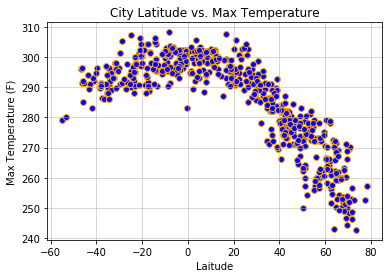

In [20]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], facecolor = "blue",edgecolor = "orange")
# format title, axis, and grid line
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()

## Latitude vs. Humidity Plot

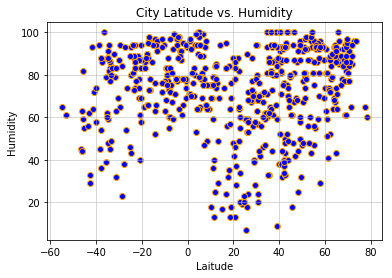

In [21]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], facecolor = "blue",edgecolor = "orange")
# format title, axis, and grid line
plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression